In [2]:
import numpy as np
import pandas as pd

In [11]:
np.random.seed(42)

In [12]:
employee_ids=[f"EMP_{i:03d}" for i in range(1,31)]
dates=pd.date_range("2025-07-01",periods=30,freq="D")
employee_ids

['EMP_001',
 'EMP_002',
 'EMP_003',
 'EMP_004',
 'EMP_005',
 'EMP_006',
 'EMP_007',
 'EMP_008',
 'EMP_009',
 'EMP_010',
 'EMP_011',
 'EMP_012',
 'EMP_013',
 'EMP_014',
 'EMP_015',
 'EMP_016',
 'EMP_017',
 'EMP_018',
 'EMP_019',
 'EMP_020',
 'EMP_021',
 'EMP_022',
 'EMP_023',
 'EMP_024',
 'EMP_025',
 'EMP_026',
 'EMP_027',
 'EMP_028',
 'EMP_029',
 'EMP_030']

In [13]:
data={
    "Date":np.tile(dates,len(employee_ids)),
    "Employee_ID":np.repeat(employee_ids,len(dates)),
    "Working_Hours":np.random.normal(4,10,size=len(dates)*len(employee_ids)).round(2)
}

In [16]:
df=pd.DataFrame(data)

In [18]:
df.to_csv("employee_working_hours.csv",index=False)

In [19]:
df_csv=pd.read_csv("employee_working_hours.csv")

In [22]:
print(df_csv.head())
print(df_csv.describe())
print(df_csv["Employee_ID"].unique())

         Date Employee_ID  Working_Hours
0  2025-07-01     EMP_001           8.97
1  2025-07-02     EMP_001           2.62
2  2025-07-03     EMP_001          10.48
3  2025-07-04     EMP_001          19.23
4  2025-07-05     EMP_001           1.66
       Working_Hours
count     900.000000
mean        4.183811
std         9.809092
min       -28.410000
25%        -2.512500
50%         4.180000
75%        10.495000
max        42.530000
['EMP_001' 'EMP_002' 'EMP_003' 'EMP_004' 'EMP_005' 'EMP_006' 'EMP_007'
 'EMP_008' 'EMP_009' 'EMP_010' 'EMP_011' 'EMP_012' 'EMP_013' 'EMP_014'
 'EMP_015' 'EMP_016' 'EMP_017' 'EMP_018' 'EMP_019' 'EMP_020' 'EMP_021'
 'EMP_022' 'EMP_023' 'EMP_024' 'EMP_025' 'EMP_026' 'EMP_027' 'EMP_028'
 'EMP_029' 'EMP_030']


In [25]:
total_hours =df_csv.groupby("Employee_ID")["Working_Hours"].sum().sort_values(ascending=False)
total_hours

Employee_ID
EMP_030    245.24
EMP_021    219.41
EMP_011    204.55
EMP_006    203.63
EMP_013    188.45
EMP_029    183.81
EMP_026    177.58
EMP_028    165.44
EMP_010    152.15
EMP_020    146.33
EMP_007    139.66
EMP_008    134.41
EMP_016    133.97
EMP_014    128.64
EMP_027    127.59
EMP_003    123.87
EMP_004    113.92
EMP_024    108.58
EMP_015    102.81
EMP_019     93.15
EMP_005     91.55
EMP_002     83.64
EMP_023     80.96
EMP_022     79.38
EMP_009     76.96
EMP_001     63.58
EMP_017     60.62
EMP_025     58.56
EMP_012     58.06
EMP_018     18.93
Name: Working_Hours, dtype: float64

In [26]:
avg_daily=df_csv.groupby("Employee_ID")["Working_Hours"].mean()

In [27]:
threshold_low=5
threshold_high=9
df_csv["Low_Hour_Flag"]=df_csv["Working_Hours"]>=threshold_low
df_csv["High_Hour_Flag"]=df_csv["Working_Hours"]<=threshold_high
print(df_csv[df_csv["Low_Hour_Flag"]|df_csv["High_Hour_Flag"]].head())

         Date Employee_ID  Working_Hours  Low_Hour_Flag  High_Hour_Flag
0  2025-07-01     EMP_001           8.97           True            True
1  2025-07-02     EMP_001           2.62          False            True
2  2025-07-03     EMP_001          10.48           True           False
3  2025-07-04     EMP_001          19.23           True           False
4  2025-07-05     EMP_001           1.66          False            True


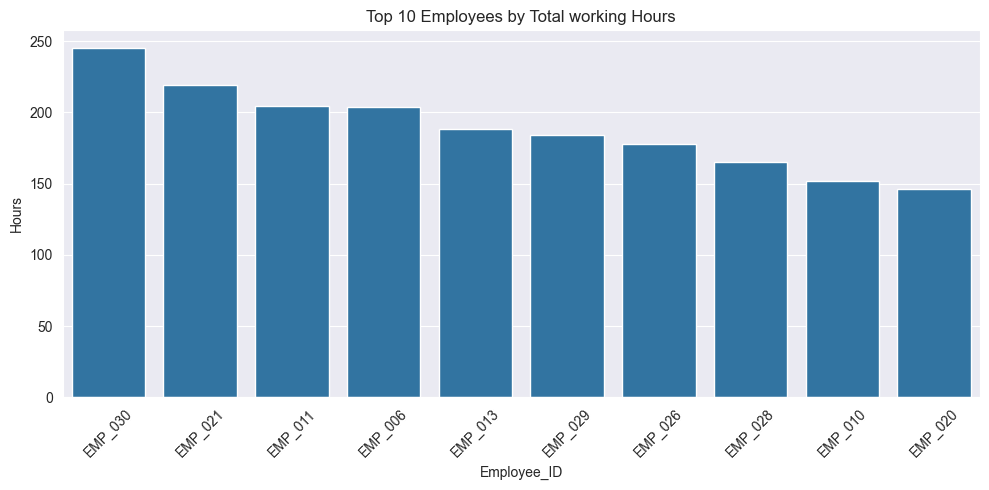

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
#Bar chart of top 10 employees with highest, total hours
top10 = total_hours.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index, y=top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 Employees by Total working Hours")
plt.ylabel("Hours")
plt.tight_layout()
plt.show()